# Mon premier classifier (en SK-LEARN)

## 1. Importation des librairies

In [15]:
# SEULEMENT AVEC SCIKIT-LEARN
# On importe les librairies nécessaires

# Le module de datasets de sklearn
from sklearn import datasets

# Les librairies habituelles
import numpy as np
import matplotlib.pyplot as plt

# On désactive les warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et formatage des données

In [16]:
# On charge les données de MNIST (incluses dans Keras)
digits = datasets.load_digits()

label = digits.target
data  = digits.data
img   = digits.images

# On inspecte les dimensions des données 
print('Dimension des labels:\n', np.shape(label), '\n')

# On inspecte les dimensions des données 
print('Dimension des data:\n', np.shape(data), '\n')

# On inspecte les dimensions des données 
print('Dimension des images:\n', np.shape(img), '\n')


Dimension des labels:
 (1797,) 

Dimension des data:
 (1797, 64) 

Dimension des images:
 (1797, 8, 8) 



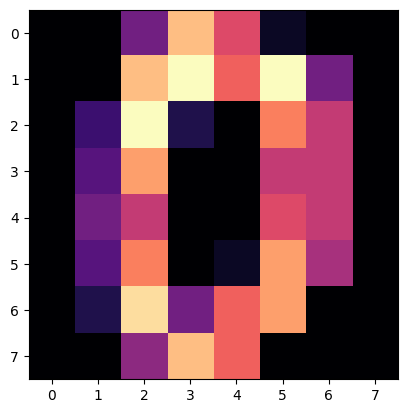

Label de l image:
 0 



In [17]:
# On trace une image
plt.imshow(img[0], cmap='magma')
plt.show()

# On vérifie le label correspondant
print('Label de l image:\n', label[0], '\n')

## 3. Première version de l'apprentissage : 5-fold 

### 3.1 Organisation des données

In [18]:
# On importe le module SVM (ou autre classifieur)
from sklearn import svm

# Maintenant on peut utiliser la librairie d'optimisation gridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# On split les données en jeux de train et test (20% de données en test)
(data_train, data_test, lbl_train, lbl_test) = train_test_split(data, label, test_size = 0.2, random_state = 0)


### 3.2 Déclaration du classifier

In [20]:
# On définit le jeu de méta-paramètres du classifieur
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# On définit la grid search
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')  #'%s_macro' % score)


### 3.3 Apprentissage du classifier

In [21]:
# On apprend le classifieur sur la base d'entrainement
clf.fit(data_train, lbl_train)

# On print le rapport de l'apprentissage
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import classification_report

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.991 (+/-0.009) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.973 (+/-0.020) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.009) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.987 (+/-0.017) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.009) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.009) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.010) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.979 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.979 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.979 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.979 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



### 3.4 Prédiction du classifieur sur la base de test

In [22]:
# On prédit sur la base de test
lbl_pred = clf.predict(data_test)

### 3.5 Evaluation du classifieur sur la base de test

In [23]:
# On importe les librairies pour l'évaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

# On calcule la matrice de confusion
cm_test = confusion_matrix(lbl_test, lbl_pred)
print('La matrice de confusion sur le jeu d entrainement :\n', cm_test, '\n')

# On calcul le score d accuracy
acc_train=accuracy_score(lbl_test, lbl_pred)
print('L accuracy sur le jeu d entrainement est :\n', acc_train)


La matrice de confusion sur le jeu d entrainement :
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]] 

L accuracy sur le jeu d entrainement est :
 0.9916666666666667


## 4. Deuxième version de l'apprentissage : train/test set (défini à la main)

### 4.1 Organisation des données

In [24]:
# On importe les librairies nécessaires
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit

# On split les données en jeux de train et test (20% de données en test)
(data_train, data_test, lbl_train, lbl_test) = train_test_split(data, label, test_size = 0.2, random_state = 0)

# On créé notre propre split de données pour l'optimisation
train_idx     = np.full(len(lbl_train), -1, dtype=int)
test_idx      = np.full(len(lbl_test), 1, dtype=int)
myFold        = np.append(train_idx, test_idx)
ps            = PredefinedSplit(myFold)

dataL          = np.vstack((data_train, data_test))
labelL         = np.append(lbl_train, lbl_test)

# On vérifie combien de split on a créé
print('Nombre de splits créé\n', ps.get_n_splits())

print(np.shape(data_train))
print(np.shape(data_test))

print(np.shape(dataL))
print(np.shape(labelL))

Nombre de splits créé
 1
(1437, 64)
(360, 64)
(1797, 64)
(1797,)


### 4.2 Déclaration du classifier

In [25]:
# On importe la librairie SVM (ou autre classifieur)
from sklearn import svm

# Maintenant on peut utiliser la librairie d'optimisation gridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# 
score = 'accuracy'

# On apprend le classifier sur les données
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=ps,
                       scoring=score)  #'%s_macro' % score)


### 4.3 Apprentissage du classifier

In [26]:
# On apprend le classifier sur la base d'entrainement
clf.fit(dataL, labelL)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import classification_report

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.992 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.992 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.992 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.992 (+/-0.000) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.978 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
0.978 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
0.978 (+/-0.000) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



### 4.4 Prédiction du classifieur sur la base de test

In [27]:
# On prédit sur la base de test
lbl_pred = clf.predict(data_test)


### 4.5 Evaluation du classifieur sur la base de test

In [28]:
# On importe les librairies pour l'évaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

# On calcule la matrice de confusion
cm_test = confusion_matrix(lbl_test, lbl_pred)
print('La matrice de confusion sur le jeu d entrainement :\n', cm_test, '\n')

# On calcul le score d accuracy
acc_train=accuracy_score(lbl_test, lbl_pred)
print('L accuracy sur le jeu d entrainement est :\n', acc_train)

La matrice de confusion sur le jeu d entrainement :
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  0  0 41]] 

L accuracy sur le jeu d entrainement est :
 0.9972222222222222


In [ ]:
## C'EST BEAUCOUP MIEUX!!! :-)